# **Stock Price Predicton Using SVM**

## 1. Importing important libraries

In [63]:
#To impliment Support vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
  
# For data Preprocessing 
import sklearn as pd
import numpy as np
  
# To plot Graphs
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Importing Dataset and Data Preparation 

In [84]:
dataset = pd.read_csv('/content/AAPL.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124802,78762700
1,2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100
2,2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300
3,2021-10-18,143.449997,146.839996,143.160004,146.550003,145.733383,85589200
4,2021-10-19,147.009995,149.169998,146.550003,148.759995,147.931061,76378900
...,...,...,...,...,...,...,...
247,2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200
248,2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100
249,2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000
250,2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700


 ### Changing the Date column as index columns

In [85]:
dataset.index = pd.to_datetime(dataset['Date'])
dataset = dataset.drop(['Date'], axis='columns')
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124802,78762700
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300
2021-10-18,143.449997,146.839996,143.160004,146.550003,145.733383,85589200
2021-10-19,147.009995,149.169998,146.550003,148.759995,147.931061,76378900
...,...,...,...,...,...,...
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000


## 3. Define independent variables

High and low -> Max and Min prices in a time period 

Open and close -> Starting and ending prices in the same period.

In [69]:
dataset['Open-Close'] = dataset.Open - dataset.Close
dataset['High-Low'] = dataset.High - dataset.Low
  
# Store all predictor variables in a variable X
X = dataset[['Open-Close', 'High-Low']]
X

,Open-Close,High-Low
Date,,
2021-10-13,0.330001,2.199997
2021-10-14,-1.649994,2.370010
2021-10-15,-1.069992,1.389999
2021-10-18,-3.100006,3.679992
2021-10-19,-1.750000,2.619995
...,...,...
2022-10-06,0.380005,2.319992
2022-10-07,2.449997,3.650009
2022-10-10,0.000000,3.319992


## 4. Define target variables

Target variable -> It is the final output/predicted value by ML model.

In [70]:
y = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

## 5: Split the data into train and test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,Open-Close,High-Low
Date,,
2022-02-18,2.520004,4.349991
2022-08-26,6.950012,7.490005
2022-10-04,-1.070007,1.960006
2021-11-30,-5.309998,5.600006
2022-03-18,-3.470001,4.720001
...,...,...
2022-01-19,3.770004,5.140000
2022-07-20,-1.919998,3.350006
2022-03-31,3.229995,3.630005


In [72]:
X_test

,Open-Close,High-Low
Date,,
2022-05-31,0.230011,3.820008
2022-02-10,2.020004,3.929993
2022-06-16,2.020004,3.350006
2022-03-09,-1.470001,4.000000
2022-05-18,6.029999,7.460007
...,...,...
2022-08-30,3.220001,4.839997
2021-11-03,-1.100006,2.149994
2022-05-20,1.500000,8.089996


##  6: Training using Support Vector Classifier (SVC)

### Used for classification of data and predict the outcome i.e value in close column.

In [73]:
val = SVC().fit(X_train, y_train)

## 7: Predicting the output and printing the accuracy 

In [74]:
p_train = val.predict(X_train)
accu_train = accuracy_score(y_train,p_train)*100
print("Training accuracy -> {:.2f} ".format(accu_train))

Training accuracy -> 58.73 


In [75]:
p_test= val.predict(X_test)
accu_test = accuracy_score(y_test,p_test)*100
print("Testing accuracy -> {:.2f} ".format(accu_test))

Testing accuracy -> 50.79 


In [76]:
dataset['Predicted_Signal'] = val.predict(X)

## 8.Calculate Daily returns 

### Daily returns = percentage diff b/w opening and closing prices
### Cumulative Returns = total change in stock price over a set time

In [77]:
dataset['Return'] = dataset.Close.pct_change()
dataset['Cum_Ret'] = dataset['Return'].cumsum()
dataset

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Cum_Ret
Date,,,,,,,,,,,
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124802,78762700,0.330001,2.199997,1,NaN,NaN
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100,-1.649994,2.370010,1,0.020226,0.020226
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,-1.069992,1.389999,1,0.007513,0.027738
2021-10-18,143.449997,146.839996,143.160004,146.550003,145.733383,85589200,-3.100006,3.679992,1,0.011806,0.039544
2021-10-19,147.009995,149.169998,146.550003,148.759995,147.931061,76378900,-1.750000,2.619995,1,0.015080,0.054624
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,0.380005,2.319992,1,-0.006626,0.082724
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,2.449997,3.650009,0,-0.036719,0.046005
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000,0.000000,3.319992,1,0.002356,0.048361


## 9.Calculate Strategy Returns 

###Strategy Returns = ROI from overall approaches
###Strategy Cumulative Returns = ROI from overall approaches in set time

In [78]:
dataset['Strategy_Return'] = dataset.Return *dataset.Predicted_Signal.shift(1)
dataset['Cum_Strategy'] = dataset['Strategy_Return'].cumsum()
dataset

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Cum_Ret,Strategy_Return,Cum_Strategy
Date,,,,,,,,,,,,,
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124802,78762700,0.330001,2.199997,1,NaN,NaN,NaN,NaN
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100,-1.649994,2.370010,1,0.020226,0.020226,0.020226,0.020226
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,-1.069992,1.389999,1,0.007513,0.027738,0.007513,0.027738
2021-10-18,143.449997,146.839996,143.160004,146.550003,145.733383,85589200,-3.100006,3.679992,1,0.011806,0.039544,0.011806,0.039544
2021-10-19,147.009995,149.169998,146.550003,148.759995,147.931061,76378900,-1.750000,2.619995,1,0.015080,0.054624,0.015080,0.054624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,0.380005,2.319992,1,-0.006626,0.082724,-0.006626,0.366041
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,2.449997,3.650009,0,-0.036719,0.046005,-0.036719,0.329322
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74899000,0.000000,3.319992,1,0.002356,0.048361,0.000000,0.329322


## 10. Plot Strategy Returns vs Original Returns

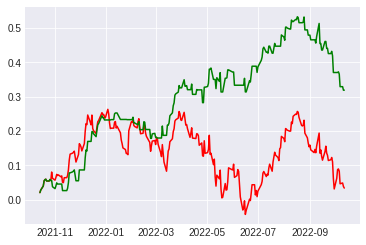

In [79]:

import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(dataset['Cum_Ret'],color='red')
plt.plot(dataset['Cum_Strategy'],color='green')

## We can see that our Strategy(Green Line) Provided the return around 31% in the last 1 year whereas the stock of apple (Red Line) Provides the Return of just around 5% in the last 1 year.

